
# Preprocessing pipelines

In this example, we will see how easy it is to construct, customise and reuse preprocessing protocols with `RamanSPy`.

Data used is from [1]_.

## Prerequisites


In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import ramanspy

In [12]:
plt.rcdefaults()

Set random seed for reproducibility



In [13]:
random.seed(42)

Define color palette.



In [14]:
colors = plt.cm.get_cmap()(np.linspace(0, 1, 4))

/var/folders/pg/fd2gphys32j1fgnzsp5dt6_w0000gn/T/ipykernel_34878/1044791852.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap()(np.linspace(0, 1, 4))


Set up global figure size.

In [15]:
plt.rcParams['figure.figsize'] = [4, 2]

## Data loading
Loading the data.



In [16]:
thp1_volumes = ramanspy.datasets.volumetric_cells(cell_type='THP-1', folder=r'../data/kallepitis_data')

# selecting the first volume
thp1_volume = thp1_volumes[0]

Grab 2 random spectra from the volume



In [17]:
random_spectra_indices = random.sample(range(thp1_volume.flat.shape[0]), 2)
random_spectra = list(thp1_volume.flat[random_spectra_indices])

Plot the raw spectra



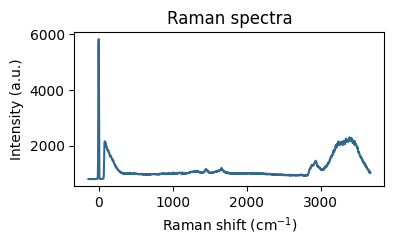

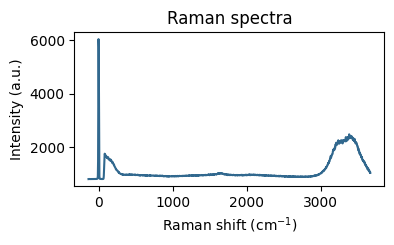

In [19]:
_ = ramanspy.plot.spectra(random_spectra, color=colors[1], plot_type='separate')

Plot the fingerprint region



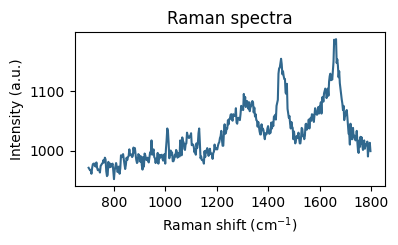

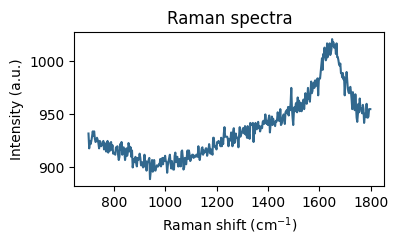

In [20]:
cropper = ramanspy.preprocessing.misc.Cropper(region=(700, 1800))
fingerprint_region = cropper.apply(random_spectra)
_ = ramanspy.plot.spectra(fingerprint_region, color=colors[1], plot_type='separate')

## Pipelines
Below, we will investigate a series of preprocessing pipelines and their effect on the spectra.



### Pipeline I
Applying a preprocessing protocol which consists of:

    - spectral cropping to the fingerprint region (700-1800 cm-1);
    - cosmic ray removal with Whitaker-Hayes algorithm;
    - denoising with a Gaussian filter;
    - baseline correction with Asymmetric Least Squares;
    - Area under the curve normalisation (pixelwise).



Define the pipeline



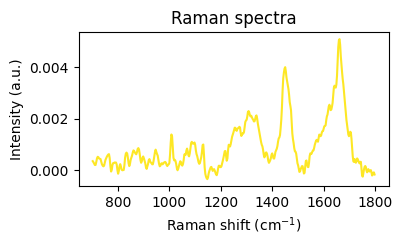

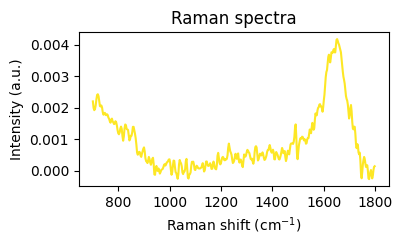

In [21]:
pipe = ramanspy.preprocessing.Pipeline([
    cropper,
    ramanspy.preprocessing.despike.WhitakerHayes(),
    ramanspy.preprocessing.denoise.Gaussian(),
    ramanspy.preprocessing.baseline.ASLS(),
    ramanspy.preprocessing.normalise.AUC(pixelwise=True),
])

# preprocess the spectra
preprocessed_spectra = pipe.apply(random_spectra)

# plot the results
_ = ramanspy.plot.spectra(preprocessed_spectra, color=colors[3], plot_type='separate')

### Pipeline II
Applying a preprocessing protocol which consists of:

    - spectral cropping to the fingerprint region (700-1800 cm-1);
    - cosmic ray removal with Whitaker-Hayes algorithm;
    - denoising with Savitzky-Golay filter with window length 9 and polynomial order 3;
    - baseline correction with Adaptive Smoothness Penalized Least Squares (asPLS);
    - MinMax normalisation (pixelwise).



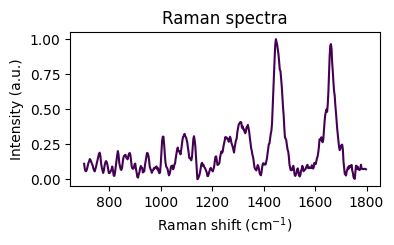

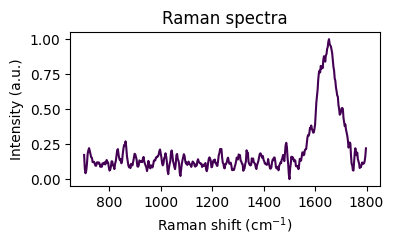

In [22]:
# preprocess the spectra
pipe = ramanspy.preprocessing.protocols.Pipeline([
    cropper,
    ramanspy.preprocessing.despike.WhitakerHayes(),
    ramanspy.preprocessing.denoise.SavGol(window_length=9, polyorder=3),
    ramanspy.preprocessing.baseline.ASPLS(),
    ramanspy.preprocessing.normalise.MinMax(pixelwise=True),
])
preprocessed_spectra = pipe.apply(random_spectra)

# plot the results
_ = ramanspy.plot.spectra(preprocessed_spectra, color=colors[0], plot_type='separate')

### Pipeline III
Applying a preprocessing protocol inspired from [2]_ which consists of:

    - spectral cropping to the fingerprint region (700-1800 cm-1);
    - cosmic ray removal with Whitaker-Hayes algorithm.
    - baseline correction with polynomial fitting of order 2;
    - (Unit) Vector normalisation (pixelwise).



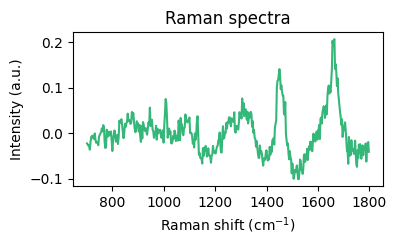

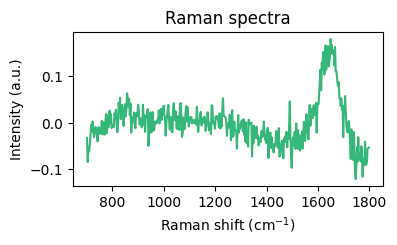

In [23]:
# preprocess the spectra
pipe = ramanspy.preprocessing.Pipeline([
    cropper,
    ramanspy.preprocessing.despike.WhitakerHayes(),
    ramanspy.preprocessing.baseline.Poly(poly_order=3),
    ramanspy.preprocessing.normalise.Vector(pixelwise=True)
])
preprocessed_spectra = pipe.apply(random_spectra)

# plot the results
_ = ramanspy.plot.spectra(preprocessed_spectra, color=colors[2], plot_type='separate')

## References
.. [1] Kallepitis, C., Bergholt, M., Mazo, M. et al. Quantitative volumetric Raman imaging of three dimensional cell cultures. Nat Commun 8, 14843 (2017).

.. [2] Bergholt MS, St-Pierre JP, Offeddu GS, Parmar PA, Albro MB, Puetzer JL, Oyen ML, Stevens MM. Raman spectroscopy reveals new insights into the zonal organization of native and tissue-engineered articular cartilage. ACS central science. 2016 Dec 28;2(12):885-95.

